In [1]:
import sys
sys.path.append('C:\\Users\\elisa\\Documents\\git\\gempy')
import gempy as gp
import numpy as np
%matplotlib inline

C:\Users\elisa\Documents\git\gempy\gempy\plotting\visualization.py:36: UserWarning: Steno 3D package is not installed. No 3D online visualization available.
  warnings.warn('Steno 3D package is not installed. No 3D online visualization available.')
C:\Users\elisa\Documents\git\gempy\gempy\data_management.py:34: UserWarning: qgrid package is not installed. No interactive dataframes available.
  warnings.warn('qgrid package is not installed. No interactive dataframes available.')
C:\Users\elisa\Documents\git\gempy\gempy\topology.py:28: UserWarning: skimage package is not installed, which is required for geomodel topology analysis.
  warnings.warn("skimage package is not installed, which is required for geomodel topology analysis.")


In [2]:
geo_data = gp.create_data([777000,794500,6345000,6350600,-1500,500],[40,40,40],
                        path_i = "C:\\Users\\elisa\\Documents\\git\\gempy\\notebooks\\prototype_notebooks\\input_data\\Elisa_model-interfaces.csv",
                        path_o = "C:\\Users\\elisa\\Documents\\git\\gempy\\notebooks\\prototype_notebooks\\input_data\\Elisa_model-orientations.csv")

In [3]:
#sorting of lithologies
gp.set_series(geo_data,{"fault1":('E_Affenadou'), "fault2":('E_MasDieu'), "Trias_Series":('LIAS','TRIAS'), 
                        "Carbon_Series":('CARBO'), "Basement_Series":('basement')},
             order_formations=np.array(['E_Affenadou','E_MasDieu','LIAS','TRIAS','CARBO','basement']))

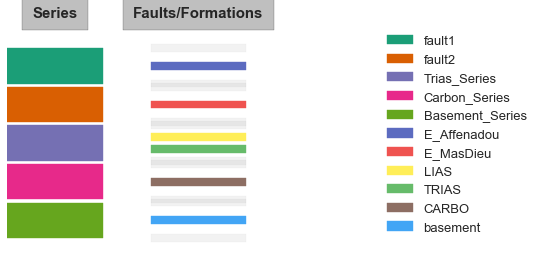

In [4]:
gp.get_sequential_pile(geo_data)

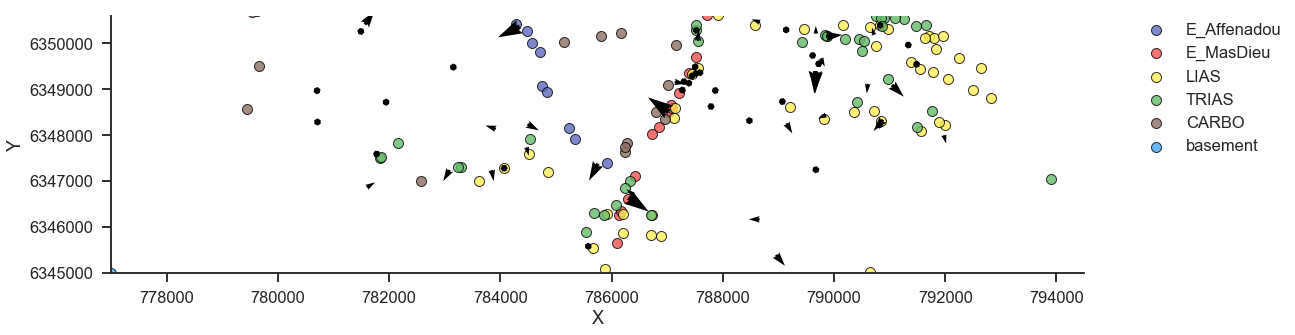

In [5]:
gp.plotting.plot_data(geo_data,direction='z')

In [6]:
#Compiling of interpolator function
interp_data = gp.InterpolatorData(geo_data, compile_theano=True,
                                  dtype='float64',theano_optimizer='fast_run')

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  2


In [7]:
lith_block, fault_block = gp.compute_model(interp_data)

C:\Users\elisa\Documents\git\gempy\gempy\gempy_front.py:953: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  "use gempy.plotting module instead", FutureWarning)


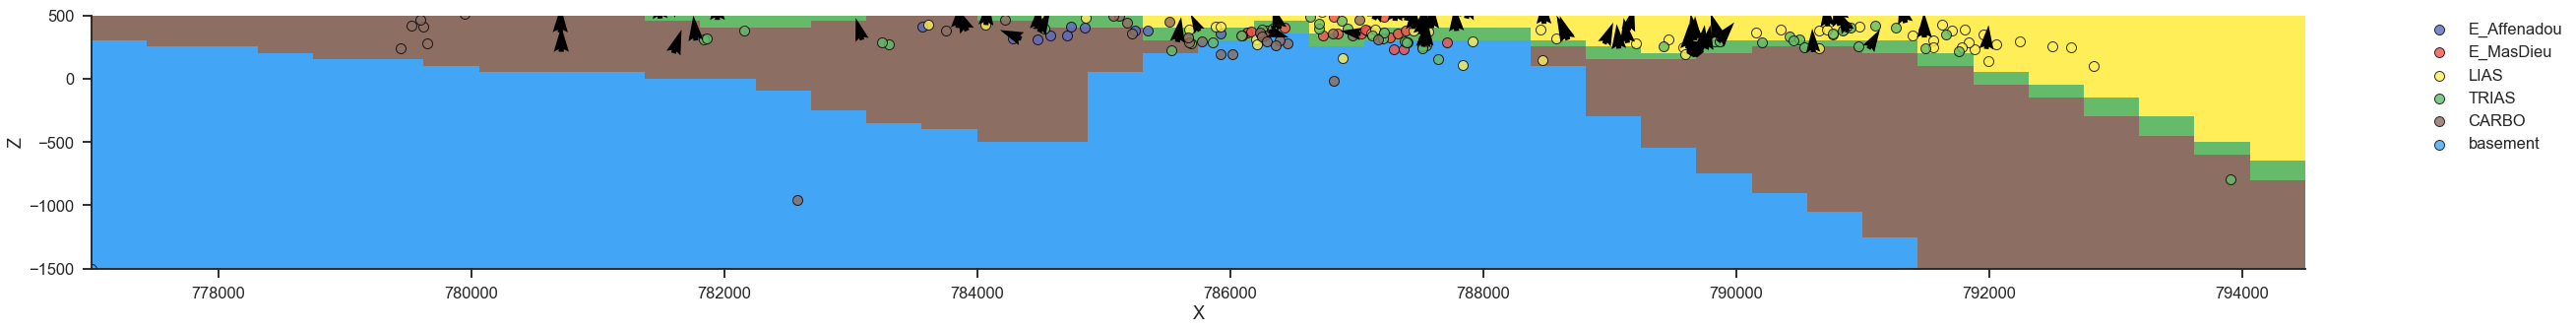

In [8]:
gp.plot_section(geo_data, lith_block[0], cell_number=20,  direction='y', plot_data=True)

C:\Users\elisa\Documents\git\gempy\gempy\gempy_front.py:953: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  "use gempy.plotting module instead", FutureWarning)


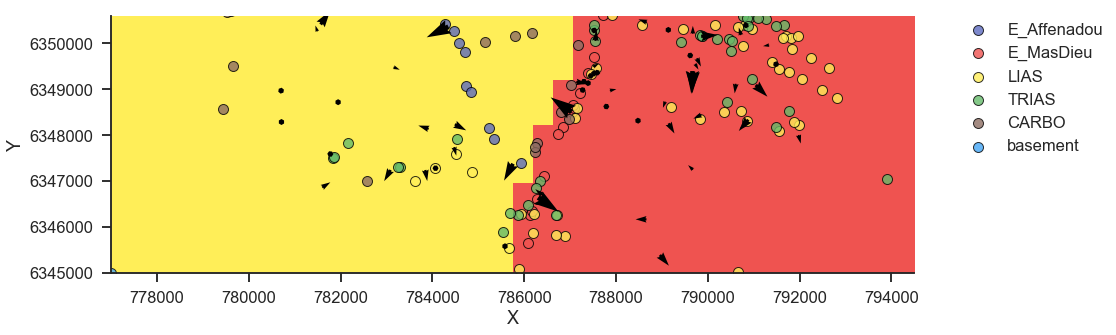

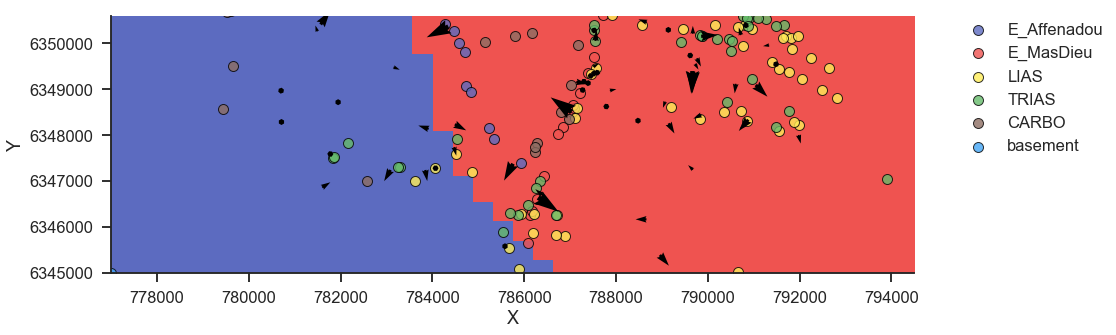

In [9]:
#faults
gp.plot_section(geo_data, fault_block[2], cell_number=5,  direction='z', plot_data=True)
gp.plot_section(geo_data, fault_block[0], cell_number=5,  direction='z', plot_data=True)